# Sentiment Analysis with Data from Twitter
## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Logged in to <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### C. Write the python code file in the notebook
### D. Push the repository to GitHub

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.7 MB/s eta 0:00:0000:0100:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 27.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 85.1 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=ffcdddabcbee42c94845a1d72e8684127b40d890b27e08b207bb92787ebd98a1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API (tokens from my twitter account)

In [3]:
# Authentication
consumerKey = "tParImakfnmQR0GvyoYjFKB5A"
consumerSecret = "SRbzkyZgef5PZxVgvKMAmNPk6KMRuUd3CkoAjxDomG1pQCXHrP"
accessToken = "1649158096197939202-OYJhxrqy8egZhMTc5dJqDg3DFWHbUm"
accessTokenSecret = "zwWU0qtbfCjvzoOwBaW524uIsHr2oBX0bDTI1QsJF3CpQ"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [11]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  ucm
Please enter how many tweets to analyze:  20


In [12]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  20
positive number:  1
negative number:  2
neutral number:  17


In [13]:
tweet_list[0:20]

,0
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
1,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
2,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
3,9 may (10-15:30 h): IV Feria de Másteres en la...
4,RT @IGeociencias: En mayo nuestra #Geocientífi...
5,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...
6,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...
7,En este hilo explico mi tesis para el concurso...
8,@ru_vein @brucebatman007 Pero por qué las vari...
9,@PutoMikel @UCM_fghis Hola: no nos consta. Lo ...


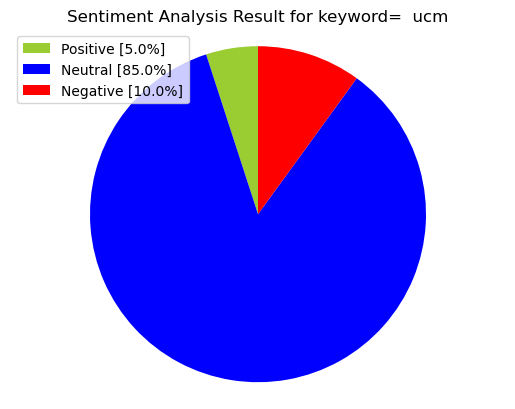

In [14]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [15]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [16]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...
3,9 may (10-15:30 h): IV Feria de Másteres en la...,9 may (10-15:30 h): IV Feria de Másteres en la...
4,RT @IGeociencias: En mayo nuestra #Geocientífi...,RT @IGeociencias: En mayo nuestra #Geocientífi...
5,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...
7,En este hilo explico mi tesis para el concurso...,En este hilo explico mi tesis para el concurso...
8,@ru_vein @brucebatman007 Pero por qué las vari...,@ru_vein @brucebatman007 Pero por qué las vari...
9,@PutoMikel @UCM_fghis Hola: no nos consta. Lo ...,@PutoMikel @UCM_fghis Hola: no nos consta. Lo ...
10,RT @IGeociencias: https://t.co/wvPToWqULG http...,RT @IGeociencias: https://t.co/wvPToWqULG http...
13,Many congratulations to Dr. Peter Warnke on hi...,Many congratulations to Dr. Peter Warnke on hi...
14,"Lección ábrete sésamo, para progres de doble r...","Lección ábrete sésamo, para progres de doble r..."


In [17]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,las brigadas t cnicas juveniles de la cmw t...
3,9 may (10-15:30 h): IV Feria de Másteres en la...,9 may 10 15 30 h iv feria de m steres en la...
4,RT @IGeociencias: En mayo nuestra #Geocientífi...,en mayo nuestra geocient ficadelmes est ded...
5,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...,subt tulos de calidad marvel marvelstud...
7,En este hilo explico mi tesis para el concurso...,en este hilo explico mi tesis para el concurso...
8,@ru_vein @brucebatman007 Pero por qué las vari...,vein pero por qu las variantes de richard...
9,@PutoMikel @UCM_fghis Hola: no nos consta. Lo ...,fghis hola no nos consta lo sentimos
10,RT @IGeociencias: https://t.co/wvPToWqULG http...,
13,Many congratulations to Dr. Peter Warnke on hi...,many congratulations to dr peter warnke on hi...
14,"Lección ábrete sésamo, para progres de doble r...",lecci n brete s samo para progres de doble r...


In [18]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_2937/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @ujc_ucmc: Las Brigadas Técnicas Juveniles ...,las brigadas t cnicas juveniles de la cmw t...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,9 may (10-15:30 h): IV Feria de Másteres en la...,9 may 10 15 30 h iv feria de m steres en la...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @IGeociencias: En mayo nuestra #Geocientífi...,en mayo nuestra geocient ficadelmes est ded...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...,subt tulos de calidad marvel marvelstud...,0.000000,0.000000,positive,0.000,0.682,0.318,0.4215
7,En este hilo explico mi tesis para el concurso...,en este hilo explico mi tesis para el concurso...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,@ru_vein @brucebatman007 Pero por qué las vari...,vein pero por qu las variantes de richard...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,@PutoMikel @UCM_fghis Hola: no nos consta. Lo ...,fghis hola no nos consta lo sentimos,0.000000,0.000000,negative,0.268,0.732,0.000,-0.2960
10,RT @IGeociencias: https://t.co/wvPToWqULG http...,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
13,Many congratulations to Dr. Peter Warnke on hi...,many congratulations to dr peter warnke on hi...,0.318182,0.477273,positive,0.000,0.553,0.447,0.8360
14,"Lección ábrete sésamo, para progres de doble r...",lecci n brete s samo para progres de doble r...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [20]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [21]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,11,73.33
positive,3,20.00
negative,1,6.67


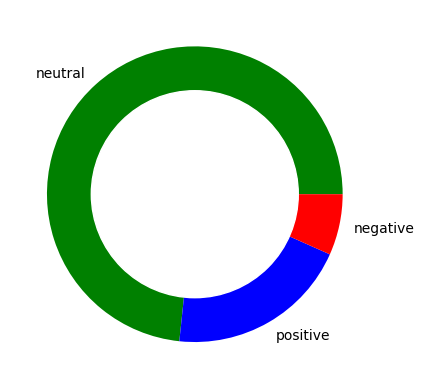

In [23]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [24]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



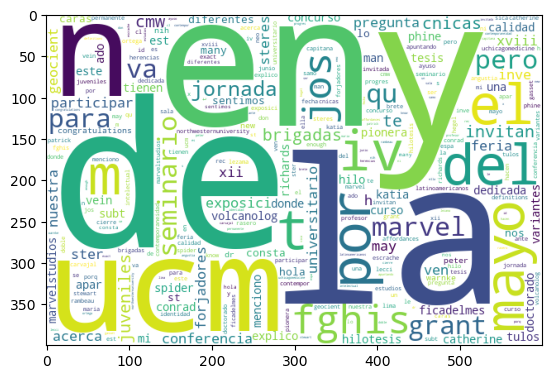

In [25]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

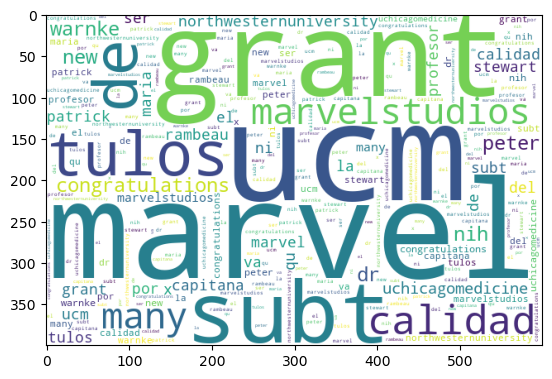

In [26]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

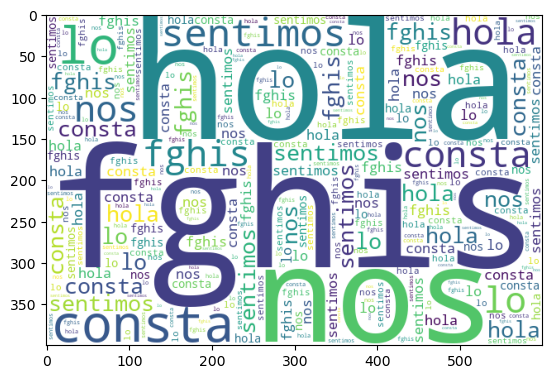

In [27]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

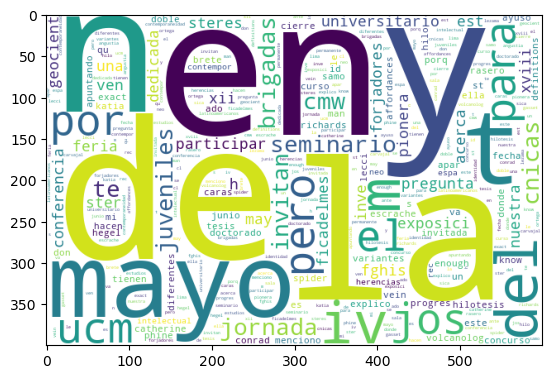

In [28]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)